In [1]:
import pandas as pd
import json

In [2]:
#读取分词后数据
data = pd.read_csv(r'C:\\Users\\X1\\Desktop\\预处理&分词\\分词结果.csv',encoding='gbk')
content = list(data['分词结果'])

In [3]:
content_list = []
for i in range(len(content)):
    s=content[i].strip("[]").split("'")
    s=list(filter(lambda x : x != '', s))
    s=list(filter(lambda x : x != ', ',s))
    content_list.append(s)

In [4]:
content_2021 = content_list[:4207]

In [5]:
content_2020 = content_list[4207:9080]

In [6]:
content_2019 = content_list[9080:16326]

In [7]:
content_2018 = content_list[16326:23614]

In [8]:
content_2017 = content_list[23614:29075]

In [9]:
content_2016 = content_list[29075:]

# 全文本聚类

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

原始长度为164596

In [8]:
document = [" ".join(sent0) for sent0 in content_list]
#向量长度缩减为十分之一
tfidf_model = TfidfVectorizer(max_features = 16460).fit(document) 
tfidf = tfidf_model.transform(document) 

In [10]:
#获取模型中的所有词语  
word = tfidf_model.get_feature_names()

In [11]:
weight = tfidf.toarray()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [13]:
import matplotlib.pyplot as plt

In [25]:
#判断最佳聚类数
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init="k-means++").fit(data).inertia_)
        
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('number of clusters')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('distortions')
    plt.savefig("./minist.jpg")
    #ax.set_title('SSE by Cluster Center Plot')

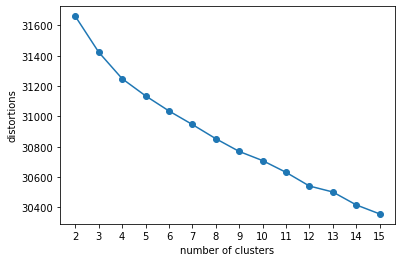

In [26]:
find_optimal_clusters(tfidf,15)

聚6类

In [27]:
clf = KMeans(n_clusters=6)
s = clf.fit(tfidf)

In [35]:
#关键词展示
print("Top terms per cluster:")
order_centroids = s.cluster_centers_.argsort()[:, ::-1]

for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :100]:
        print(' %s' % word[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 新华社 记者 当日 中国 北京 国家 举行 习近平 总理 活动 铁路 李克强 全国 进行 河北省 游客 旅游 日摄 发展 农民 拍摄 旅客 企业 当地 我国 国务院 中华人民共和国 主席 日电 工作 种植 介绍 目前 服务 文化 高铁 情况 学生 项目 建设 无人机 会议 工程 开展 中心 出席 国际 工作人员 上海 村民 群众 位于 这是 答记者问 正式 任命 主题 发布会 国务院新闻办公室 市民 生产 代表 了解 现场 来到 发言人 实现 各地 安全 体验 大桥 产业 近日 广西 世界 大会 景区 表示 生态 公里 组织 城市 技术 展示 参观 列车 产品 吸引 参加 博览会 农业 时间 考察 今年 开幕 地区 公司 工人 期间 机器人
Cluster 1: 企业 就业 改革 政策 减税 发展 小微 李克强 创新 创业 服务 支持 市场主体 降费 经济 降低 国务院 环境 工作 市场 进一步 总理 贷款 今年 我国 审批 推进 部门 实施 优化 毕业生 营商 促进 推动 监管 加大 全国 投资 增长 金融 增值税 税收 力度 措施 收费 纳税人 制造业 民营企业 疫情 地方 提高 会议 活力 融资 实现 加快 实体经济 资金 重点 中国 持续 成本 中小企业 要求 提升 方面 落实 制度 试点 问题 双创 行业 完善 中央 出台 事项 扩大 放管服 高校 社会 表示 增加 互联网 中小 银行 经营 建设 鼓励 保障 民生 加强 常务会议 新增 平台 万元 产业 办理 激发 国家 领域
Cluster 2: 中国 发展 全球 世界 经济 国际 合作 习近平 国家 开放 创新 中国经济 各国 企业 推动 人类 贸易 增长 世界经济 疫情 投资 联合国 表示 实现 主席 建设 李克强 市场 共同 持续 美国 成为 坚持 论坛 改革 一个 经济增长 促进 重要 数字 时代 环境 我国 出席 全球化 命运 推进 一路 一带 进口 知识产权 治理 不断 领域 改革开放 构建 总理 未来 社会 指出 发展中国家 技术 发表 共同体 复苏 继续 对外开放 报告 认为 大会 今年 北京 挑战 和平 峰会 应对 全面 科技 经济发展 贡献 提供 历史 积极 问题 强调 产业 制造 体系 保护 代表 支持 外资 国内

In [ ]:
民生实时、双创改革、经济发展、外交合作、信息公开、发展战略

In [30]:
#输出每类有几篇文章
result = list(clf.predict(tfidf))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{5: 7818, 1: 2868, 0: 14051, 2: 2491, 3: 3632, 4: 1931}


绘图

In [32]:
import matplotlib as mpl

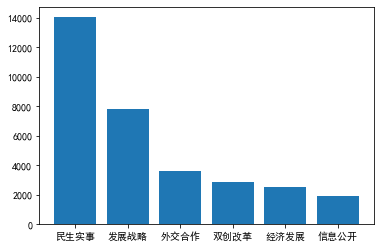

In [33]:
mpl.rcParams["font.sans-serif"]=["SimHei"]#显示中文
name=["民生实事","发展战略","外交合作","双创改革","经济发展","信息公开"]
weight=[14051,7818,3632,2868,2491,1931]
plt.bar(name,weight)
plt.show()

# 2021年数据聚类

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

原始长度为64148

In [50]:
document_2021 = [" ".join(sent0) for sent0 in content_2021]
#向量长度缩减为十分之一
tfidf_model_2021 = TfidfVectorizer(max_features = 6415).fit(document_2021) 
tfidf_2021 = tfidf_model_2021.transform(document_2021) 

In [52]:
#获取模型中的所有词语  
word_2021 = tfidf_model_2021.get_feature_names()

In [53]:
weight_2021 = tfidf_2021.toarray()

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [23]:
import matplotlib.pyplot as plt

In [21]:
#判断最佳聚类数
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init="k-means++").fit(data).inertia_)
        
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

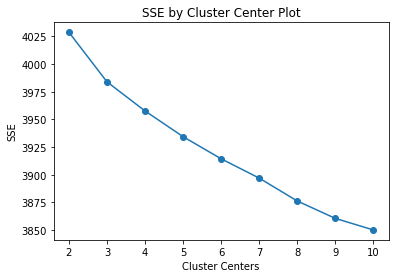

In [25]:
find_optimal_clusters(tfidf_2021,10)

聚六类

In [55]:
clf_2021 = KMeans(n_clusters=6)
s_2021 = clf_2021.fit(tfidf_2021)

In [56]:
#关键词展示
print("Top terms per cluster:")
order_centroids = s_2021.cluster_centers_.argsort()[:, ::-1]

for i in range(6):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % word_2021[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 习近平 主席 视频 发表 出席 中华人民共和国 峰会 国家 日晚 方式
Cluster 1: 企业 就业 发展 中国 市场主体 政策 创新 支持 服务 改革
Cluster 2: 增长 同比 百分点 增速 月份 企业 消费 同期 我国 制造业
Cluster 3: 工作 国家 全国 保障 服务 国务院 疫情 安全 我国 建设
Cluster 4: 习近平 中国 总书记 发展 中国共产党 伟大 中华民族 全面 建设 历史
Cluster 5: 合作 中方 中国 王毅 发展 双方 关系 共同 愿同 外长


In [57]:
#输出每类有几篇文章
result = list(clf_2021.predict(tfidf_2021))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{4: 476, 1: 817, 3: 1637, 0: 356, 5: 527, 2: 394}


聚十类

In [58]:
clf_202110 = KMeans(n_clusters=10)
s_202110 = clf_202110.fit(tfidf_2021)

In [59]:
#关键词展示
print("Top terms per cluster:")
order_centroids = s_202110.cluster_centers_.argsort()[:, ::-1]

for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % word_2021[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 中国 全球 疫苗 发展 合作 接种 世界 国际 经济 疫情
Cluster 1: 就业 毕业生 创业 招聘 高校 劳动者 服务 岗位 灵活 培训
Cluster 2: 习近平 视频 主席 发表 出席 峰会 日晚 国家 方式 领导人
Cluster 3: 工作 服务 发展 全国 国家 国务院 建设 疫情 保障 我国
Cluster 4: 企业 发展 市场主体 政策 制造业 创新 支持 李克强 小微 改革
Cluster 5: 粮食 农村 农业 乡村 保护 生产 工作 生态 农民 脱贫
Cluster 6: 习近平 中国 中国共产党 总书记 发展 伟大 中华民族 全面 历史 建设
Cluster 7: 增长 同比 增速 百分点 月份 消费 企业 同期 两年 平均
Cluster 8: 中华人民共和国 全国人民代表大会常务委员会 主席令 第十三届 现予 特命 全权大使 施行 公布 日起
Cluster 9: 中方 合作 王毅 双方 中国 关系 发展 外长 愿同 共同


In [61]:
#输出每类有几篇文章
result = list(clf_202110.predict(tfidf_2021))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{6: 403, 3: 1517, 4: 440, 0: 317, 2: 285, 9: 385, 5: 399, 7: 331, 1: 89, 8: 41}


# 农村相关聚类

In [62]:
content_nongcun = []
for i in range(len(content_list)):
    if ('农村' in content_list[i]):
        content_nongcun.append(content_list[i])

原始向量长度71334

In [65]:
document_nc = [" ".join(sent0) for sent0 in content_nongcun]
#向量长度缩减为十分之一
tfidf_model_nc = TfidfVectorizer(max_features = 7133).fit(document_nc) 
tfidf_nc = tfidf_model_nc.transform(document_nc) 
word_nc = tfidf_model_nc.get_feature_names()
weight_nc = tfidf_nc.toarray()

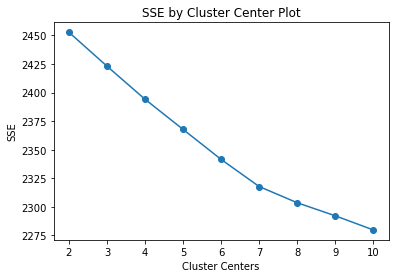

In [66]:
find_optimal_clusters(tfidf_nc,10)

聚八类

In [71]:
clf_nc8 = KMeans(n_clusters = 8)
s_nc8 = clf_nc8.fit(tfidf_nc)
#关键词展示
print("Top terms per cluster:")
order_centroids = s_nc8.cluster_centers_.argsort()[:, ::-1]

for i in range(8):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :50]:
        print(' %s' % word_nc[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 快递 邮政 寄递 国家邮政局 亿件 网点 快件 服务 物流 业务量 包裹 末端 电商 农村 马军胜 进村 通邮 行业 发展 农产品 企业 超过 同比 增长 建制 网络 配送 业务收入 直接 乡镇 地区 全国 智能 投递 下乡 实现 我国 站点 进城 目前 达到 完成 业务 万个 今年 覆盖率 提升 支撑 菜鸟 乡村
Cluster 1: 消费 增长 同比 百分点 增速 上年 月份 投资 发展 上半年 我国 全国 经济 零售额 企业 三季度 一季度 消费品 下降 升级 汽车 工业 加快 上涨 经济增长 价格 电商 商品 人均 持续 中国 服务业 商务部 农村 分别 网络 中国经济 零售总额 规模 零售 以上 同期 潜力 制造业 市场 可支配收入 保持 增加值 平稳 服务
Cluster 2: 农业 粮食 农民 农产品 发展 生产 农村 农业农村部 改革 供给 推进 乡村 产业 我国 绿色 面积 全国 种植 三农 经营 玉米 小麦 建设 丰收 新型 现代农业 农机 农户 加快 万亩 结构性 粮食安全 增收 融合 主体 振兴 稳定 机械化 质量 合作社 今年 增长 提高 中国 政策 现代化 耕地 增加 达到 夏粮
Cluster 3: 乡村 振兴 农村 农业 人居 农民 整治 环境 村庄 发展 三农 建设 治理 推进 胡春华 工作 旅游 战略 垃圾 全面 产业 行动 农业农村部 现代化 脱贫 实施 清洁 厕所 习近平 宜居 加快 美丽 强调 生活 城乡 推动 生态 体系 坚持 中央 总书记 文化 污水 全国 改善 融合 加强 改革 机制 攻坚
Cluster 4: 就业 创业 毕业生 农民工 万人 高校 人员 岗位 城镇 企业 劳动力 政策 服务 培训 失业率 失业 招聘 劳动者 返乡 稳定 技能 社部 形势 促进 新增 工作 今年 支持 吸纳 困难 群体 灵活 民生 补贴 我国 全国 人力资源 发展 保障 调查 优先 重点 扩大 增长 稳岗 经济 疫情 职业技能 实施 月份
Cluster 5: 发展 农村 工作 企业 建设 服务 改革 全国 推进 国家 保障 疫情 加强 教育 国务院 记者 安全 政策 李克强 地区 养老 问题 我国 中国 支持 新华社 开展 就业 儿童 实施 制度 重点 推动 群众 

In [72]:
#输出每类有几篇文章
result = list(clf_nc8.predict(tfidf_nc))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{2: 264, 5: 1314, 3: 145, 0: 60, 4: 109, 7: 352, 1: 207, 6: 191}


聚七类

In [74]:
clf_nc7 = KMeans(n_clusters = 7)
s_nc7 = clf_nc7.fit(tfidf_nc)
#关键词展示
print("Top terms per cluster:")
order_centroids = s_nc7.cluster_centers_.argsort()[:, ::-1]

for i in range(7):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :50]:
        print(' %s' % word_nc[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 扶贫 脱贫 攻坚 贫困 贫困地区 贫困人口 帮扶 精准 工作 攻坚战 贫困户 产业 贫困县 群众 资金 胡春华 扶贫开发 发展 减贫 乡村 搬迁 深度 习近平 农村 打赢 保障 全面 任务 摘帽 实现 返贫 问题 易地 政策 就业 建档立卡 地区 解决 强调 全国 确保 饮水 国务院扶贫办 总书记 国务院 贫困村 致贫 医疗 加强 中国
Cluster 1: 就业 创业 毕业生 农民工 万人 高校 人员 岗位 城镇 企业 服务 政策 劳动力 培训 失业率 招聘 劳动者 失业 返乡 稳定 技能 社部 促进 形势 工作 新增 支持 今年 吸纳 困难 灵活 群体 民生 我国 补贴 全国 人力资源 发展 重点 稳岗 优先 保障 增长 经济 扩大 调查 职业技能 实施 疫情 求职
Cluster 2: 农业 乡村 农民 农村 发展 粮食 振兴 农产品 生产 三农 产业 推进 改革 建设 农业农村部 供给 现代化 我国 工作 加快 绿色 经营 融合 全国 新型 战略 丰收 现代农业 创新 政策 种植 主体 全面 体系 创业 胡春华 农户 中国 面积 增收 服务 实施 合作社 实现 结构性 促进 农机 休闲 支持 质量
Cluster 3: 农村 发展 工作 建设 企业 服务 改革 全国 推进 国家 保障 加强 疫情 国务院 记者 教育 安全 李克强 乡村 政策 地区 问题 我国 开展 养老 新华社 支持 实施 中国 生活 群众 重点 推动 儿童 制度 就业 部门 要求 资金 环境 社会 学生 提升 整治 地方 城市 管理 完善 实现 提高
Cluster 4: 消费 增长 同比 百分点 增速 上年 月份 投资 上半年 发展 全国 三季度 经济 我国 下降 零售额 一季度 企业 加快 消费品 价格 升级 汽车 上涨 工业 农村 持续 人均 电商 经济增长 商品 中国 分别 中国经济 服务业 商务部 规模 网络 以上 同期 平稳 零售总额 可支配收入 保持 制造业 零售 潜力 供给 农产品 增加值
Cluster 5: 快递 邮政 寄递 国家邮政局 亿件 网点 快件 服务 物流 业务量 包裹 末端 电商 农村 马军胜 进村 通邮 行业 发展 农产品 企业 超过 同比 增长 建制 网络 配送 业务收入 直接 乡镇 地

In [75]:
#输出每类有几篇文章
result = list(clf_nc7.predict(tfidf_nc))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{2: 344, 3: 1353, 5: 60, 4: 229, 1: 107, 6: 355, 0: 194}


# 农业相关聚类

In [76]:
content_nongye = []
for i in range(len(content_list)):
    if ('农业' in content_list[i]):
        content_nongye.append(content_list[i])

In [77]:
len(content_nongye)

2845

原始向量长度为69971

In [82]:
document_ny = [" ".join(sent0) for sent0 in content_nongye]
#向量长度缩减为十分之一
tfidf_model_ny = TfidfVectorizer(max_features = 6997).fit(document_ny) 
tfidf_ny = tfidf_model_ny.transform(document_ny) 
word_ny = tfidf_model_ny.get_feature_names()
weight_ny = tfidf_ny.toarray()

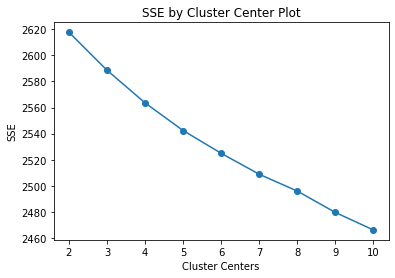

In [83]:
find_optimal_clusters(tfidf_ny,10)

聚十类

In [93]:
clf_ny10 = KMeans(n_clusters = 10)
s_ny10 = clf_ny10.fit(tfidf_ny)
#关键词展示
print("Top terms per cluster:")
order_centroids = s_ny10.cluster_centers_.argsort()[:, ::-1]

for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :50]:
        print(' %s' % word_ny[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 合作 中方 中国 双方 总理 发展 李克强 领域 共同 主席 习近平 总统 会见 关系 一带 一路 国家 加强 两国 中东欧 表示 推动 愿同 东盟 国际 深化 贸易 支持 交流 投资 务实 经济 领导人 王毅 两国关系 互利 地区 会谈 和平 维护 出席 中非 人文 共建 继续 签署 会晤 建设 新华社 论坛
Cluster 1: 农业 发展 工作 全国 记者 建设 总理 我国 农村 企业 改革 国家 李克强 生产 服务 农产品 中国 新华社 推进 国务院 工程 农民 保护 资金 创新 开展 项目 技术 问题 保障 要求 生态 重点 节水 数据 普查 地方 安全 政策 部门 支持 情况 地区 管理 实施 领域 加强 群众 财政部 卫星
Cluster 2: 粮食 生产 农业 小麦 面积 玉米 农机 耕地 万亩 农田 农民 绿色 补贴 今年 农业农村部 全国 发展 机械化 种植 高标准 夏粮 我国 粮食安全 供给 农产品 种粮 丰收 亿亩 大豆 质量 推进 增加 收购 稳定 确保 保障 建设 秋粮 政策 化肥 提高 水稻 服务 农村 春耕 胡春华 优质 改革 农户 抓好
Cluster 3: 增长 同比 百分点 增速 月份 上半年 投资 一季度 三季度 上年 消费 下降 价格 经济 就业 全国 工业 增加值 服务业 加快 上涨 以上 我国 分别 总体 企业 发展 制造业 平稳 持续 农村 保持 同期 规模 环比 恢复 回落 农产品 生猪 态势 稳定 平均 生产 经济增长 两年 人均 cpi 今年 产量 影响
Cluster 4: 就业 企业 发展 改革 疫情 工作 推进 政策 会议 防控 推动 建设 完善 国务院 支持 经济 加快 创新 创业 保障 加强 促进 服务 重点 实施 做好 加大 消费 李克强 供给 制度 落实 提高 民生 全面 进一步 部门 报告 我国 机制 国家 坚持 社会 投资 优化 力度 要求 部署 中央 任务
Cluster 5: 农村 乡村 振兴 农民 农业 发展 三农 农产品 建设 产业 推进 工作 改革 现代化 脱贫 电商 融合 全面 体系 战略 创业 加快 城乡 服务 旅游 农业农村部 实施 休闲 人居 全国 胡春华 创新 供给 政策 整治 环境 快递 支持 推动 习近平

In [85]:
#输出每类有几篇文章
result = list(clf_ny10.predict(tfidf_ny))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{9: 233, 7: 276, 3: 233, 5: 281, 1: 268, 0: 964, 6: 138, 2: 317, 4: 28, 8: 107}


# 企业相关聚类

In [86]:
content_qiye = []
for i in range(len(content_list)):
    if ('企业' in content_list[i]):
        content_qiye.append(content_list[i])

In [87]:
len(content_qiye)

11013

原始向量长度113549

In [89]:
document_qy = [" ".join(sent0) for sent0 in content_qiye]
#向量长度缩减为十分之一
tfidf_model_qy = TfidfVectorizer(max_features = 11355).fit(document_qy) 
tfidf_qy = tfidf_model_qy.transform(document_qy) 
word_qy = tfidf_model_qy.get_feature_names()
weight_qy = tfidf_qy.toarray()
#tfidf_qy

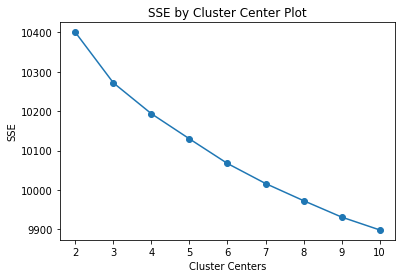

In [90]:
find_optimal_clusters(tfidf_qy,10)

聚八类

In [91]:
clf_qy8 = KMeans(n_clusters = 8)
s_qy8 = clf_qy8.fit(tfidf_qy)
#关键词展示
print("Top terms per cluster:")
order_centroids = s_qy8.cluster_centers_.argsort()[:, ::-1]

for i in range(8):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :50]:
        print(' %s' % word_qy[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 企业 工作 生产 疫情 服务 记者 发展 新华社 安全 国家 全国 我国 中国 扶贫 保障 快递 防控 国务院 建设 部门 问题 要求 开展 药品 管理 加强 重点 项目 监管 通知 地区 改革 产业 消费 推进 产品 市场 相关 政策 目前 表示 北京 情况 进行 复工 支持 群众 中央 李克强 行业
Cluster 1: 合作 中方 中国 双方 发展 李克强 共同 总理 一带 一路 关系 习近平 王毅 主席 领域 国家 会见 两国 愿同 中东欧 投资 加强 表示 中欧 总统 推动 国际 支持 交流 互利 贸易 领导人 务实 维护 欢迎 经济 共建 两国关系 希望 深化 多边 各国 世界 和平 倡议 会晤 东盟 出席 继续 建设
Cluster 2: 贷款 小微 金融 企业 银行 支持 实体经济 融资 金融机构 货币政策 余额 信贷 流动性 利率 央行 同比 政策 货币 资金 增长 增速 降准 普惠 保监会 民营企业 人民银行 企业融资 月末 金融服务 商业银行 增加 百分点 力度 中国人民银行 普惠小微 中小 加大 融资成本 疫情 合理 银行业 风险 发展 服务 保持 定向 长期贷款 稳健 个体工商户 融资规模
Cluster 3: 增长 同比 百分点 月份 增速 工业 制造业 下降 企业 消费 我国 利润 以上 指数 上半年 分别 上年 服务业 规模 投资 行业 全国 一季度 外贸 经济 加快 发展 回升 收入 持续 保持 三季度 同期 回落 pmi 增加值 国家统计局 态势 出口 进出口 恢复 平稳 实现 高技术 营业 比上 价格 中国 10 总体
Cluster 4: 中国 全球 中国经济 世界 发展 经济 开放 增长 投资 国际 美国 企业 市场 贸易 合作 创新 外资 世界经济 疫情 外商投资 经济增长 国家 表示 各国 成为 环境 知识产权 进口 李克强 博会 消费 推动 对外开放 认为 全球化 一带 一路 持续 我国 改革 今年 报告 复苏 实现 营商 一个 未来 不断 领域 技术
Cluster 5: 就业 毕业生 创业 高校 招聘 岗位 万人 培训 农民工 城镇 人员 政策 劳动者 劳动力 企业 服务 灵活 失业 工作 失业率 补贴 群体 技能 稳定 吸纳 支持 职业 社部 促

In [92]:
#输出每类有几篇文章
result = list(clf_qy8.predict(tfidf_qy))
print ('Cluster distribution:')
print (dict([(i, result.count(i)) for i in result]))

Cluster distribution:
{7: 1682, 6: 1081, 0: 4693, 2: 472, 3: 1019, 1: 901, 5: 342, 4: 823}


聚十类

In [95]:
clf_qy10 = KMeans(n_clusters = 10)
s_qy10 = clf_qy10.fit(tfidf_qy)
#关键词展示
print("Top terms per cluster:")
order_centroids = s_qy10.cluster_centers_.argsort()[:, ::-1]

for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :50]:
        print(' %s' % word_qy[ind], end='')
    print()

Top terms per cluster:
Cluster 0: 减税 降费 纳税人 增值税 企业 税收 政策 税务 改增 改革 税率 办税 税负 万元 小微 纳税 优惠政策 扣除 部门 国家税务总局 今年 降低 享受 负担 市场主体 支出 税务总局 缴费 优惠 所得税 抵扣 税费 服务 措施 预算 实施 试点 发展 减轻 增长 支持 研发 申报 财政 全国 行业 新增 落实 进一步 成本
Cluster 1: 合作 中方 中国 双方 发展 李克强 共同 总理 一带 一路 关系 习近平 王毅 主席 领域 国家 会见 两国 愿同 中东欧 投资 加强 表示 中欧 总统 推动 国际 交流 互利 支持 贸易 领导人 务实 维护 欢迎 经济 共建 两国关系 希望 深化 多边 各国 世界 和平 倡议 会晤 东盟 出席 继续 建设
Cluster 2: 增长 同比 月份 百分点 增速 工业 消费 我国 下降 利润 企业 制造业 上半年 以上 投资 上年 分别 规模 一季度 外贸 全国 服务业 收入 行业 发展 加快 三季度 同期 经济 增加值 持续 保持 进出口 出口 营业 实现 态势 国家统计局 10 恢复 高技术 回升 价格 平稳 今年 利润总额 回落 产业 总体 平均
Cluster 3: 发展 创新 改革 建设 企业 习近平 李克强 中国 经济 推动 我国 互联网 产业 推进 工作 国家 加快 科技 制造 创业 工业 制造业 技术 促进 总书记 总理 坚持 服务 支持 实现 体系 消费 加强 全面 提升 强调 融合 领域 升级 双创 政策 国务院 社会 高质量 完善 就业 考察 农业 生态 供给
Cluster 4: 企业 工作 生产 疫情 记者 发展 新华社 安全 国家 服务 中国 全国 我国 扶贫 国务院 保障 防控 问题 要求 部门 开展 药品 建设 加强 通知 管理 重点 项目 监管 改革 政策 地区 产品 产业 相关 情况 推进 市场 消费 北京 李克强 表示 目前 中央 复工 支持 进行 落实 群众 做好
Cluster 5: 中国 全球 中国经济 世界 发展 经济 开放 增长 投资 国际 美国 企业 市场 合作 创新 贸易 外资 世界经济 经济增长 疫情 国家 表示 各国 外商投资 知识产权 成为 李克强 环境 进口 博会 消费 推动 认为 对外开放 全球